# Numpy, Matlplotlib & Pandas
+ Libraries
- Plots

Make sure to **comment ur code** and explore its `methods`

In [104]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline --> For seeing plots in a new window
#%timeit --> used for timing a code block
#Commands starting with ! is instructed to be run in the CMD

In [105]:
x = np.linspace(0.1,3,20).round(2)
x

array([0.1 , 0.25, 0.41, 0.56, 0.71, 0.86, 1.02, 1.17, 1.32, 1.47, 1.63,
       1.78, 1.93, 2.08, 2.24, 2.39, 2.54, 2.69, 2.85, 3.  ])

In [106]:
y = np.sin(x).round(2)
y = 

array([0.1 , 0.25, 0.4 , 0.53, 0.65, 0.76, 0.85, 0.92, 0.97, 0.99, 1.  ,
       0.98, 0.94, 0.87, 0.78, 0.68, 0.57, 0.44, 0.29, 0.14])

In [107]:
arr = np.random.rand(10).round(2)
# plt.plot(arr,'r:*')
# Data is taken as Y-axis; X-axis is optional, so by default index is taken as X-coordinates

In [108]:
xticks = np.arange(0.1, 3.1, 0.4)

## Reference for Markdown in Jupyter NB
- https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
- https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd
- https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm



## Reference for PLOTS:
- https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
- https://matplotlib.org/3.1.1/api/markers_api.html
- https://matplotlib.org/3.1.0/gallery/color/named_colors.html
- https://matplotlib.org/3.1.0/tutorials/colors/colors.html

## Latex Code
- Individual Code
- Inline Code

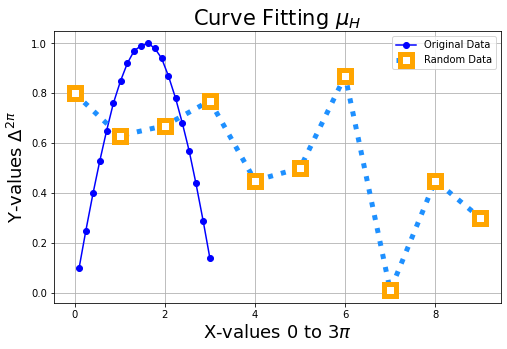

In [121]:
#PLot size
fig = plt.figure(figsize = (8,5))

#Actual Plot
plt.plot(x,y,'b-o', label='Original Data') #color of the line & markers, linestyle, markrstyle
plt.plot(arr,'r:s', label='Random Data', color='dodgerblue', \
        linewidth=5, markersize=12, markeredgecolor='orange', markeredgewidth=5, \
        markerfacecolor='white')

#Plot labels (with Inline Latex Code)
plt.xlabel('X-values 0 to $3\pi$',fontsize=18)
plt.ylabel('Y-values $\Delta^{2\pi}$',fontsize=18) 
plt.title('Curve Fitting $\mu_H$',fontsize=21)
plt.legend()

#plt.xticks(xticks)
plt.grid(True) #Grid in plot
plt.show()
fig.savefig('Sample.png', dpi=150)

In [237]:
np.random.seed(101)
x = np.linspace(0.1,3,20).round(2)
y = np.round(np.sin(x) + 0.1*np.random.randn(20), 2)
p = np.poly1d(np.polyfit(x,y,15))

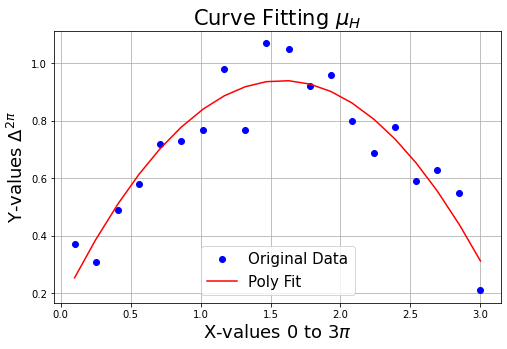

In [230]:
#PLot size
fig = plt.figure(figsize = (8,5))

#Actual Plot
plt.plot(x,y,'bo', label='Original Data') #color of the line & markers, linestyle, markrstyle

# t = np.linspace(0.1,3,100)
# plt.plot(t,p(t),'r-',label='Poly Fit')
plt.plot(x,p(x),'r-',label='Poly Fit')

#Plot labels (with Inline Latex Code)
plt.xlabel('X-values 0 to $3\pi$',fontsize=18)
plt.ylabel('Y-values $\Delta^{2\pi}$',fontsize=18) 
plt.title('Curve Fitting $\mu_H$',fontsize=21)
plt.legend(fontsize=15, loc='lower center')

#plt.xticks(xticks)
plt.grid(True) #Grid in plot
plt.show()
fig.savefig('Sample.png', dpi=150)

In [231]:
# You can use MSE or R2 (decreases/increases)--> Evaluation Metrics for the polynomial
# The best fitting polynomial will have :
# Lowest MSE(lower limit of 0); Max R2(upper limit of 1)
y_pred = p(x)

error = y_pred - y
MSE = (error**2).mean()
MSE

0.0072062950887810395

In [232]:
# Sum of squares of Residuals/Errors
SSR = (error**2).sum()

# Sum of squares of deviations of y from its mean
SST = ((y-y.mean())**2).sum() 
R2 = 1- (SSR/SST)
R2

0.8666062892247981

In [233]:
from sklearn.metrics import r2_score, mean_squared_error
mean_squared_error(y,y_pred), r2_score(y,y_pred)

(0.0072062950887810395, 0.8666062892247981)

In [234]:
# Sqrt of MSE; Bringing MSE back to 1-degree poly to compare with y value
RMSE = np.sqrt(MSE)
RMSE
# Ex ---> 
# If y_pred = 1.2 , I can confidently say actual value would have been: 
# y = [(y_pred-RMSE) to (y_pred-RMSE)]
#   = (1.2 - 0.08) to (1.2 + 0.08) 
#   = 1.12 to 1.28

# Ex --->
# Model's Prediction is 1.2, with a confidence of +/- 10
# If the RMSE exceeds our predicted value, it'll definitely not have confidence.

0.08488989980428202

In [235]:
# 1. MSE/R2 represents how much percent of the pattern it captures from original data

# 2. RMSE is for making sense of predictions. So, it is used to compare errors/confidence.
#    MSE/R2 is to compare across models

# 3. Lower the RMSE, more confidence we will have in our prediction

# 4. MSE is Dataset dependent(Can only use if datasets are "EXACTLY SAME")
#    R2 is Dataset independent(Can only use if the the dataset pattern is similar; like similar subsamples from a population but still different datasets.)
#    If datasets are completely different, don't even bother to compare models.

In [243]:
MSE_val = []
R2_val = []

for deg in range(1,15):
    p = np.poly1d(np.polyfit(x,y,deg))
    MSE_val.append(mean_squared_error(y,p(x)))
    R2_val.append(100*r2_score(y,p(x)))

Text(0, 0.5, 'R2 Values')

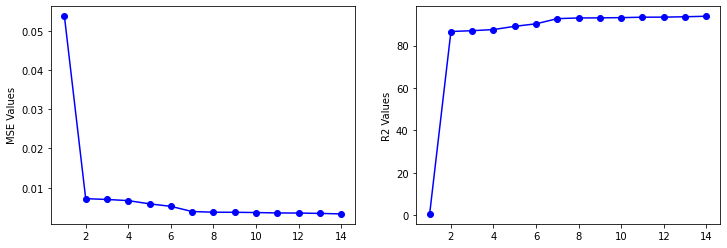

In [246]:
degrees = list(range(1,15))
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(degrees,MSE_val,'b-o')
plt.ylabel('MSE Values')

plt.subplot(1,2,2)
plt.plot(degrees,R2_val,'b-o')
plt.ylabel('R2 Values')